# Climate Change Exploratory Data Analysis

Climate change is one of the most pressing issues facing the global community today, with far-reaching implications across environmental, economic, and social dimensions. The rising earth surface temperature, driven by increased greenhouse gas emissions, is a key indicator of climate change. This project aims to explore global temperature trends over the past centuries, identify key patterns and anomalies, and understand the broader implications of these changes on different geographical regions. By leveraging data science techniques, this analysis seeks to provide insights into the magnitude and distribution of temperature changes and contribute to the ongoing conversation around climate mitigation and adaptation strategies.

## Downloading the data and initial set-up

In [1]:
!pip install opendatasets
!pip install pandas

In [2]:
import opendatasets as od 
import pandas 
  
od.download('https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data')

Skipping, found downloaded files in ".\climate-change-earth-surface-temperature-data" (use force=True to force download)


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd

global_temps = pd.read_csv(r'climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')
country_temps = pd.read_csv(r'climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv')
city_temps = pd.read_csv(r'climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv')

## Data preprocessing

In [4]:
global_temps.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
global_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [6]:
global_temps.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [7]:
country_temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [8]:
country_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


In [9]:
country_temps.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,544811.000000,545550.000000
mean,17.193354,1.019057
std,10.953966,1.201930
min,-37.658000,0.052000
25%,10.025000,0.323000
50%,20.901000,0.571000
75%,25.814000,1.206000
max,38.842000,15.003000


In [10]:
city_temps.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [11]:
city_temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


In [12]:
city_temps.describe()

,AverageTemperature,AverageTemperatureUncertainty
count,8.235082e+06,8.235082e+06
mean,1.672743e+01,1.028575e+00
std,1.035344e+01,1.129733e+00
min,-4.270400e+01,3.400000e-02
25%,1.029900e+01,3.370000e-01
50%,1.883100e+01,5.910000e-01
75%,2.521000e+01,1.349000e+00
max,3.965100e+01,1.539600e+01


In [14]:
#Let's remove the duplicated countries (in the analysis, we don't consider the presence of  colonies at this the countries) and countries for which no information about the temperature

country_temps_clear = country_temps[~country_temps['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

country_temps_clear = country_temps_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

## Exploratory analysis and visualisation

### 1) Mapping of average temperatures in the countries¶

In [15]:
#Let's average temperature for each country

countries = np.unique(country_temps_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(country_temps_clear[country_temps_clear['Country'] == 
                                               country]['AverageTemperature'].mean())


    
data = [dict(type = 'choropleth', locations = countries, z = mean_temp, locationmode = 'country names',
        text = countries, marker = dict(line = dict(color = 'rgb(0,0,0)', width = 1)),
        colorbar = dict(autotick = True, tickprefix = '', title = '# Average\nTemperature,\n°C'))]

layout = dict(title = 'Average land temperature in countries', geo = dict(showframe = False, showocean = True,
        oceancolor = 'rgb(0,255,255)', projection = dict(type = 'orthographic', rotation = dict(lon = 60, lat = 10),),
        lonaxis =  dict(showgrid = True, gridcolor = 'rgb(102, 102, 102)'),
        lataxis = dict(showgrid = True,gridcolor = 'rgb(102, 102, 102)')),)

fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False, filename='worldmap')


It is possible to notice that Russia has one of the lowest average temperature (like a Canada). The lowest temperature in Greenland (it is distinctly visible on the map). The hottest country in Africa, on the equator. It is quite natural.
Russia has one of the lowest average temperature same as Canada. The lowest temperature in Greenland (it is distinctly visible on the map). The hottest country in Africa, on the equator.

### 2) Sorting the countries by the average temperature and plotting horizontal bar graph

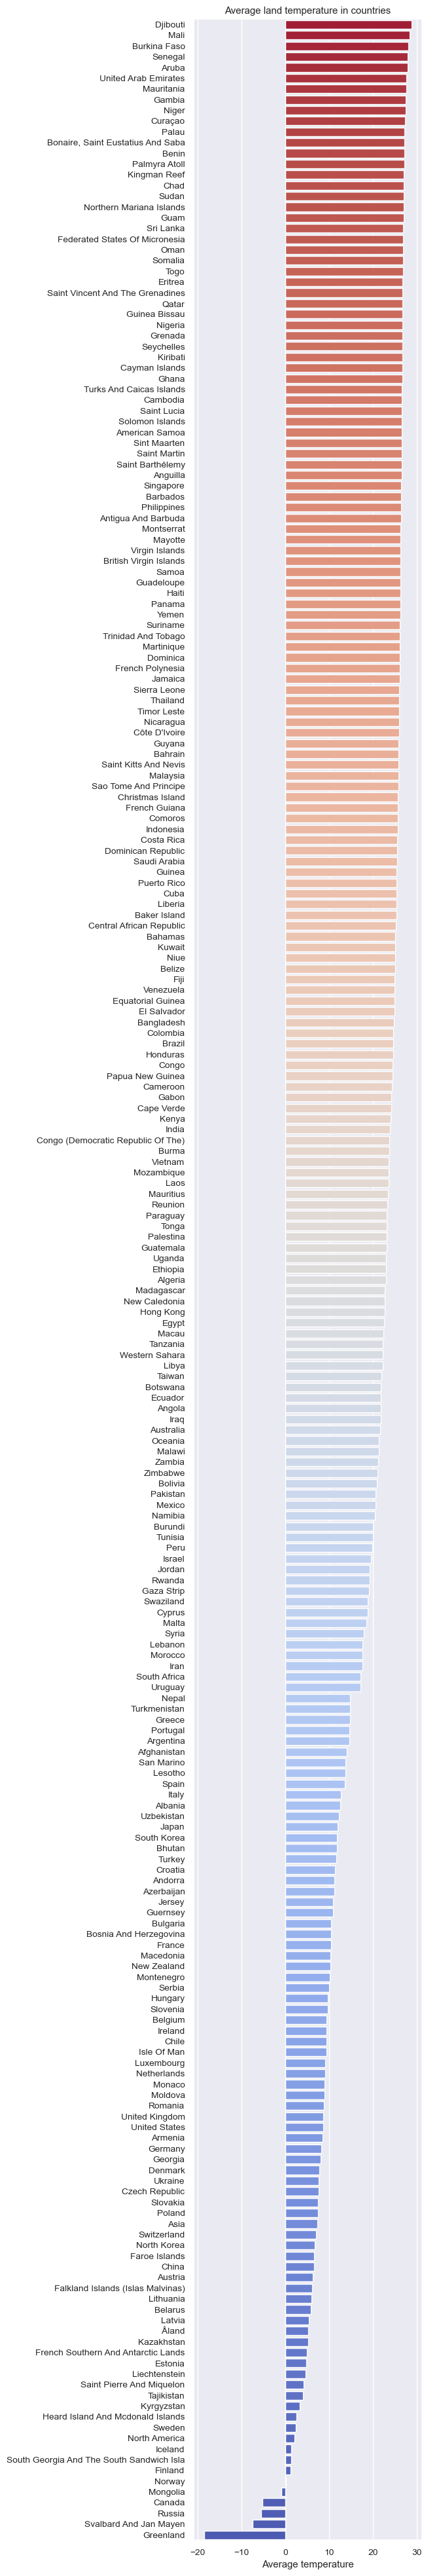

In [16]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(x=mean_temp_bar, y=countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

### 3) Analysis the average seasonal temperature

In [18]:
# drop unnecessary columns
global_temps = global_temps[['dt', 'LandAverageTemperature']]

global_temps['dt'] = pd.to_datetime(global_temps['dt'])
global_temps['year'] = global_temps['dt'].map(lambda x: x.year)
global_temps['month'] = global_temps['dt'].map(lambda x: x.month)

def get_season(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer'
    elif month >= 9 and month <= 11:
        return 'autumn'
    else:
        return 'winter'
    
min_year = global_temps['year'].min()
max_year = global_temps['year'].max()
years = range(min_year, max_year + 1)

global_temps['season'] = global_temps['month'].apply(get_season)

spring_temps = []
summer_temps = []
autumn_temps = []
winter_temps = []

for year in years:
    curr_years_data = global_temps[global_temps['year'] == year]
    spring_temps.append(curr_years_data[curr_years_data['season'] == 'spring']['LandAverageTemperature'].mean())
    summer_temps.append(curr_years_data[curr_years_data['season'] == 'summer']['LandAverageTemperature'].mean())
    autumn_temps.append(curr_years_data[curr_years_data['season'] == 'autumn']['LandAverageTemperature'].mean())
    winter_temps.append(curr_years_data[curr_years_data['season'] == 'winter']['LandAverageTemperature'].mean())

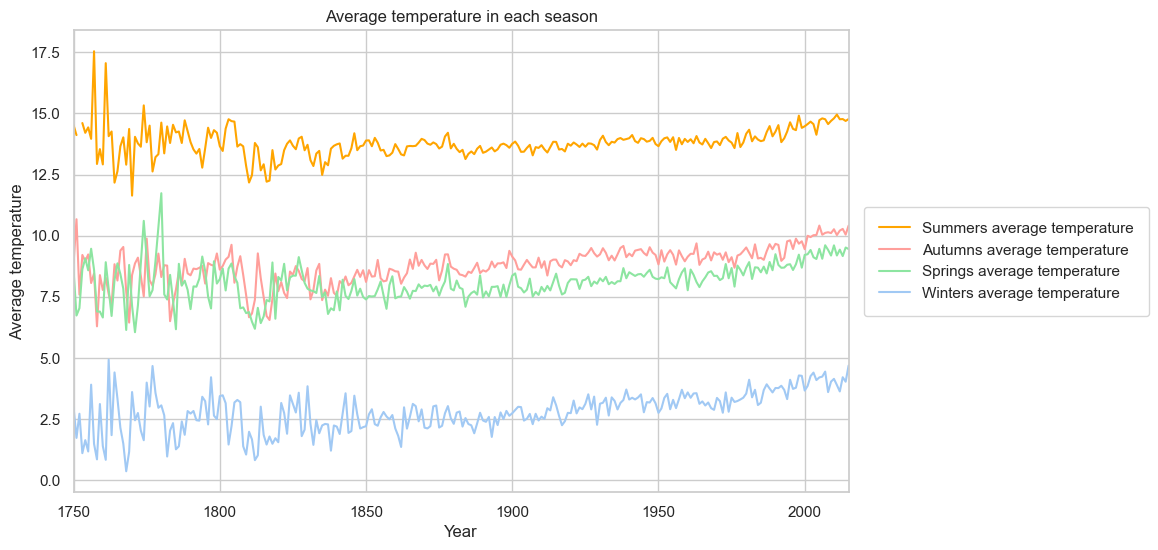

In [19]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
f, ax = plt.subplots(figsize=(10, 6))

plt.plot(years, summer_temps, label='Summers average temperature', color='orange')
plt.plot(years, autumn_temps, label='Autumns average temperature', color='r')
plt.plot(years, spring_temps, label='Springs average temperature', color='g')
plt.plot(years, winter_temps, label='Winters average temperature', color='b')

plt.xlim(min_year, max_year)

ax.set_ylabel('Average temperature')
ax.set_xlabel('Year')
ax.set_title('Average temperature in each season')
legend = plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True, borderpad=1, borderaxespad=1)

### 4) Analysing countries with the highest temp difference

In [21]:
countries = country_temps['Country'].unique()

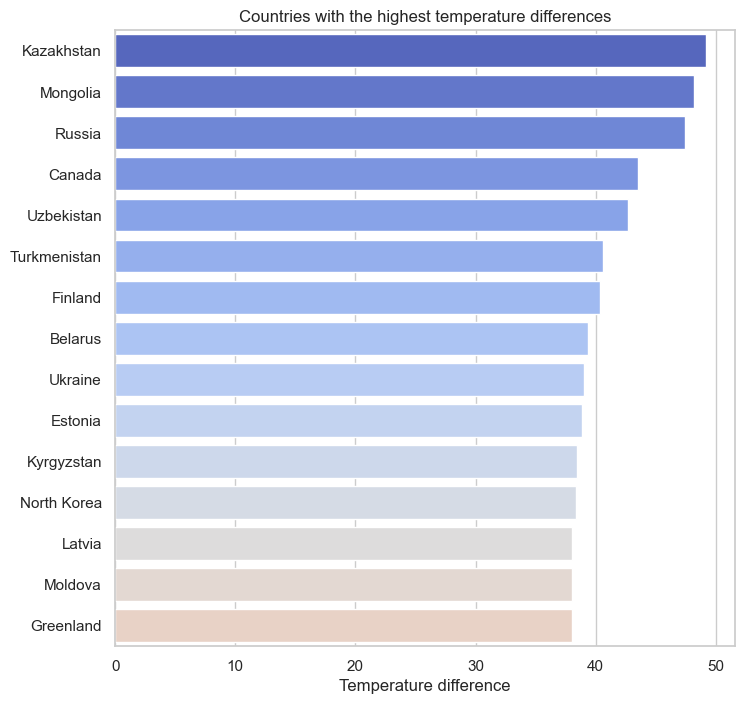

In [24]:
max_min_list = []

# getting max and min temps
for country in countries:
    curr_temps = country_temps[country_temps['Country'] == country]['AverageTemperature']
    max_min_list.append((curr_temps.max(), curr_temps.min()))
    
# nan cleaning
res_max_min_list = []
res_countries = []

for i in range(len(max_min_list)):
    if not np.isnan(max_min_list[i][0]):
        res_max_min_list.append(max_min_list[i])
        res_countries.append(countries[i])
        
# calc differences        
differences = []

for tpl in res_max_min_list:
    differences.append(tpl[0] - tpl[1])
    
# sorting
differences, res_countries = (list(x) for x in zip(*sorted(zip(differences, res_countries), key=lambda pair: pair[0], reverse=True)))

# ploting
f, ax = plt.subplots(figsize=(8, 8))
sns.barplot(x=differences[:15], y=res_countries[:15], palette=sns.color_palette("coolwarm", 25), ax=ax)

texts = ax.set(ylabel="", xlabel="Temperature difference", title="Countries with the highest temperature differences")

# Inferences

The analysis of global surface temperature data reveals several significant trends and patterns:

##### Consistent Rise in Global Temperatures: 
The data shows a clear upward trend in global temperatures, particularly from the mid-20th century onwards. This aligns with the increasing concentration of greenhouse gases in the atmosphere due to industrial activities. The most pronounced temperature increases are observed in recent decades, indicating the acceleration of global warming.

##### Regional Disparities: 
While the global trend is upward, the rate of temperature increase varies significantly across different regions. For instance, the Arctic region has experienced the most substantial warming, a phenomenon known as Arctic amplification. This has led to drastic changes in the polar ice caps and has broader implications for global sea levels.

##### Anomalous Temperature Spikes: 
The analysis highlights specific years with significant temperature anomalies. These spikes often correspond to known climatic events, such as El Niño, which temporarily disrupt global weather patterns. Such anomalies underscore the complex interplay between natural variability and human-induced climate change.

###### Seasonal Variations: 
The data also indicates seasonal variations in temperature trends, with winter months showing more pronounced warming compared to summer months. This seasonal disparity could have significant impacts on ecosystems, agriculture, and energy consumption patterns.

# Conclusion

This project underscores the urgent need for comprehensive climate action. The rising trend in global temperatures, coupled with the regional and seasonal disparities, highlights the complex nature of climate change and its diverse impacts. The findings of this analysis can inform policy-making, particularly in areas like climate adaptation and mitigation. By understanding the nuances of temperature trends, stakeholders can develop more targeted strategies to combat climate change and protect vulnerable regions and populations. Moving forward, integrating additional variables such as carbon emissions, deforestation rates, and socioeconomic factors could provide even deeper insights into the drivers and consequences of global warming.